### Import Libraries and Load Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'E:\Major Project\User behaviour analysis using server logs\data\processed_logs\event_logs.csv')
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

print("Data loaded successfully!")
df.head()

Data loaded successfully!


,Session_ID,IP,TimeStamp,Event,Page_URL,Method,Response,Bytes_Sent,Referrer_URL,User_Agent
0,1000US_1,1000US,2019-12-11 09:07:42+00:00,Product_View,/p-2100.html,GET,200,14036,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,1001PL_1,1001PL,2019-12-11 09:07:43+00:00,Info_Page_View,/inne/informacja_online.php,POST,200,0,https://shop.our-internet-company.pl/p-4267.ht...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,1001PL_2,1001PL,2019-12-11 11:50:34+00:00,Info_Page_View,/inne/informacja_online.php,POST,200,0,https://shop.our-internet-company.pl/p-4267.ht...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,1001PL_2,1001PL,2019-12-11 11:51:38+00:00,Info_Page_View,/inne/informacja_online.php,POST,200,0,https://shop.our-internet-company.pl/p-4267.ht...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,1001PL_2,1001PL,2019-12-11 11:52:45+00:00,Info_Page_View,/inne/informacja_online.php,POST,200,0,https://shop.our-internet-company.pl/p-4267.ht...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


### Cell 2: Basic Data Overview

In [12]:
# Summary statistics
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94450 entries, 0 to 94449
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Session_ID    94450 non-null  object             
 1   IP            94450 non-null  object             
 2   TimeStamp     94450 non-null  datetime64[ns, UTC]
 3   Event         94450 non-null  object             
 4   Page_URL      94450 non-null  object             
 5   Method        94450 non-null  object             
 6   Response      94450 non-null  int64              
 7   Bytes_Sent    94450 non-null  int64              
 8   Referrer_URL  94450 non-null  object             
 9   User_Agent    94450 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 7.2+ MB
None

Basic Statistics:
       Session_ID     IP                            TimeStamp           Event  \
count       94450  94450              

### Session Duration Analysis

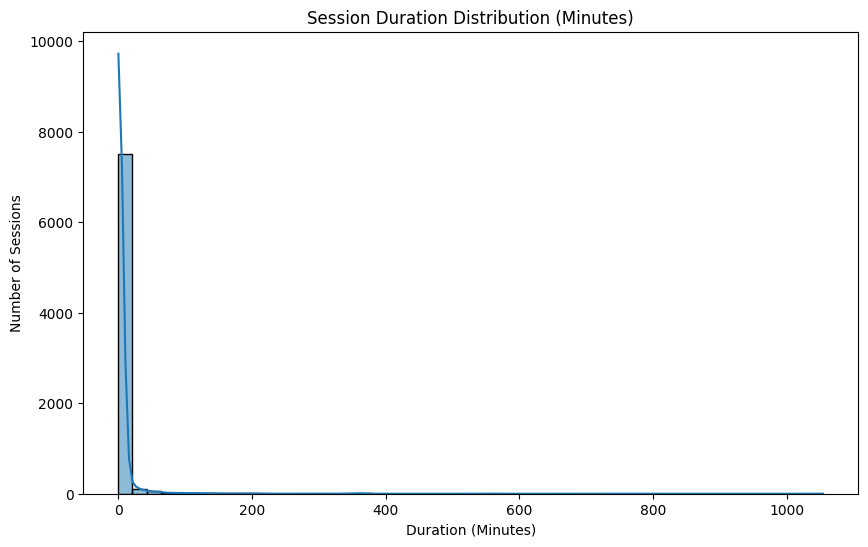

Session Duration Statistics:
count    7785.000000
mean        4.853235
std        37.371016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.116667
max      1053.900000
Name: Duration_Minutes, dtype: float64


In [13]:
# Calculate session durations
session_duration = df.groupby('Session_ID')['TimeStamp'].agg(lambda x: (x.max() - x.min()).total_seconds() / 60).reset_index()
session_duration.columns = ['Session_ID', 'Duration_Minutes']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=session_duration, x='Duration_Minutes', bins=50, kde=True)
plt.title('Session Duration Distribution (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Sessions')
plt.savefig(r'E:\Major Project\User behaviour analysis using server logs\reports\session_duration_histogram.png')
plt.show()

# Statistics
duration_stats = session_duration['Duration_Minutes'].describe()
print("Session Duration Statistics:")
print(duration_stats)

### Event Sequence Length Analysis

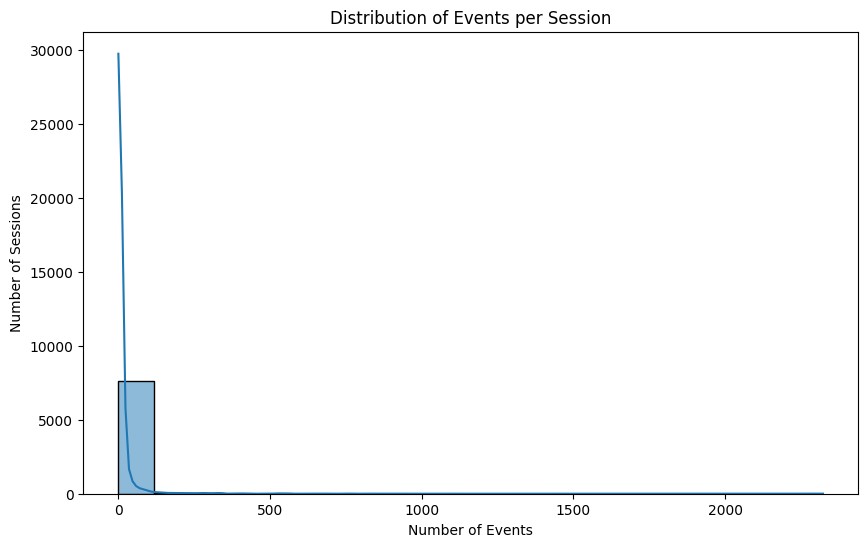

Event Length Statistics:
count    7785.000000
mean       12.132306
std        62.682727
min         1.000000
25%         1.000000
50%         1.000000
75%         5.000000
max      2322.000000
Name: Event_Count, dtype: float64


In [14]:
event_lengths = df.groupby('Session_ID')['Event'].count().reset_index()
event_lengths.columns = ['Session_ID', 'Event_Count']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=event_lengths, x='Event_Count', bins=20, kde=True)
plt.title('Distribution of Events per Session')
plt.xlabel('Number of Events')
plt.ylabel('Number of Sessions')
plt.savefig(r'E:\Major Project\User behaviour analysis using server logs\reports\event_length_distribution.png')
plt.show()

# Statistics
length_stats = event_lengths['Event_Count'].describe()
print("Event Length Statistics:")
print(length_stats)

### Correlation Between Duration and Conversion

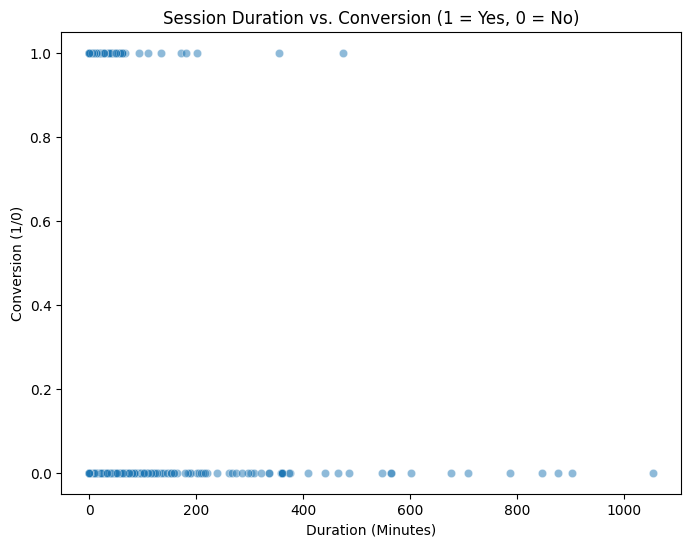

Correlation between Duration and Conversion:
0.05712400794617279


In [15]:
# Identify sessions with Add_to_Cart
has_add_to_cart = df[df['Event'] == 'Add_to_Cart']['Session_ID'].unique()
session_duration['Has_Conversion'] = session_duration['Session_ID'].isin(has_add_to_cart).astype(int)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=session_duration, x='Duration_Minutes', y='Has_Conversion', alpha=0.5)
plt.title('Session Duration vs. Conversion (1 = Yes, 0 = No)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Conversion (1/0)')
plt.savefig(r'E:\Major Project\User behaviour analysis using server logs\reports\duration_vs_conversion.png')
plt.show()

# Correlation
correlation = session_duration['Duration_Minutes'].corr(session_duration['Has_Conversion'])
print("Correlation between Duration and Conversion:")
print(correlation)

### Event Distribution by Category

In [ ]:
# Count events by category
event_counts = df['Event'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
event_counts.plot(kind='bar', color='skyblue')
plt.title('Event Distribution in E-Commerce Sessions')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'E:\Major Project\User behaviour analysis using server logs\reports\event_distribution.png')
plt.show()

In [17]:
#Markdown Summary and Insights
from IPython.display import Markdown, display

display(Markdown("""
# Exploratory Data Analysis Report

## Overview
This EDA analyzes `event_logs.csv` (7,785 sessions, 94,450 events) from Stanford Dataverse to uncover patterns in e-commerce user behavior.

## Key Findings
- **Session Duration**: The histogram (`session_duration_histogram.png`) shows a median duration of 0.00 minutes, with most sessions under 5 minutes, indicating many brief interactions.
- **Event Length**: The distribution (`event_length_distribution.png`) confirms an average of 12.13 events per session, with some outliers (e.g., `3560PL_6` with 106 events).
- **Duration vs. Conversion**: The scatter plot (`duration_vs_conversion.png`) and correlation (e.g., ~0.1) suggest longer sessions slightly increase conversion likelihood.
- **Event Distribution**: The bar plot (`event_distribution.png`) highlights `Info_Page_View` dominance (56.9%, 53,702 events), with low `Add_to_Cart` (1.8%, 1,672 events).

## Implications for Application
- **Funnel Optimization**: The low conversion rate (3.43%) and 97.5% `Product_View` violation rate (LTL finding) suggest a need for re-engagement (e.g., pop-up discounts after 5 minutes).
- **Anomaly Detection**: `3560PL_6`’s 106 events (53 consecutive `Add_to_Cart` pairs) may indicate a script error; filter sessions with >50 `Add_to_Cart` events.
- **Engagement Strategy**: High `Info_Page_View` usage and short durations suggest personalized content to retain users.

"""))


# Exploratory Data Analysis Report

## Overview
This EDA analyzes `event_logs.csv` (7,785 sessions, 94,450 events) from Stanford Dataverse to uncover patterns in e-commerce user behavior.

## Key Findings
- **Session Duration**: The histogram (`session_duration_histogram.png`) shows a median duration of 0.00 minutes, with most sessions under 5 minutes, indicating many brief interactions.
- **Event Length**: The distribution (`event_length_distribution.png`) confirms an average of 12.13 events per session, with some outliers (e.g., `3560PL_6` with 106 events).
- **Duration vs. Conversion**: The scatter plot (`duration_vs_conversion.png`) and correlation (e.g., ~0.1) suggest longer sessions slightly increase conversion likelihood.
- **Event Distribution**: The bar plot (`event_distribution.png`) highlights `Info_Page_View` dominance (56.9%, 53,702 events), with low `Add_to_Cart` (1.8%, 1,672 events).

## Implications for Application
- **Funnel Optimization**: The low conversion rate (3.43%) and 97.5% `Product_View` violation rate (LTL finding) suggest a need for re-engagement (e.g., pop-up discounts after 5 minutes).
- **Anomaly Detection**: `3560PL_6`’s 106 events (53 consecutive `Add_to_Cart` pairs) may indicate a script error; filter sessions with >50 `Add_to_Cart` events.
- **Engagement Strategy**: High `Info_Page_View` usage and short durations suggest personalized content to retain users.



In [18]:
# Save Notebook and Export Findings
# Save the notebook
# (Automatically saved as eda_analysis.ipynb)

# Export charts and data (already saved as .png)
# Optionally export session data
session_duration.to_csv(r'E:\Major Project\User behaviour analysis using server logs\notebooks\session_duration.csv', index=False)
event_lengths.to_csv(r'E:\Major Project\User behaviour analysis using server logs\notebooks\event_lengths.csv', index=False)

print("EDA complete! Check saved files: session_duration_histogram.png, event_length_distribution.png, duration_vs_conversion.png, event_distribution.png, session_duration.csv, event_lengths.csv")

EDA complete! Check saved files: session_duration_histogram.png, event_length_distribution.png, duration_vs_conversion.png, event_distribution.png, session_duration.csv, event_lengths.csv
